In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import cluster
from collections import Counter

df = pd.read_csv('data/FIFA22_official_data.csv')
player_names = df['Name']
positions = df['Position']
player_names.to_csv('data/prepared_data/player_names.csv', index=False)  

In [162]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Similar Positions
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,CAM
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,LDM
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,RS
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,RCM
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,LB


In [137]:
def clean_data(df):
  # Drop unsued columns
  columns_to_drop = ['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Special', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Best Overall Rating'
                     ,'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Release Clause', 'Similar Positions']
  df_cleaned = df = df.drop(columns_to_drop, axis=1)

  # Convert types and conventions
  df_cleaned['Weight'] = df_cleaned['Weight'].apply(weight_to_kg)
  df_cleaned['Height'] = df_cleaned['Height'].apply(height_to_cm)

  df_numeric = df_cleaned.select_dtypes(include=[np.number])
  df_numeric = df_numeric.fillna(df_numeric.mean())
  return df_numeric

def weight_to_kg(s):
    if 'kg' in s:
        return float(s.replace('kg', ''))
    else:
        return float(s.strip('lbs')) * 0.453592

def height_to_cm(s):
    if 'cm' in s:
        return float(s.replace('cm', ''))
    else:
        # Convert feet'inches" to cm
        feet, inches = map(int, s.split("'"))
        return (feet * 30.48) + (inches * 2.54)

In [138]:
df_cleaned = clean_data(df)
df_cleaned.head(2)

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,179.0,69.0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,...,87.0,48.0213,73.0,65.0,12.0,14.0,15.0,8.0,14.0,72.0
1,189.0,82.0,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,...,82.0,48.0213,85.0,77.0,13.0,8.0,15.0,11.0,9.0,74.0


In [139]:
def prepare_data_to_kmeans(df, save = True, position_name=None):
  df_numeric = df.select_dtypes(include=[np.number])

  df_numeric = df_numeric.fillna(df_numeric.mean())
  scaler = MinMaxScaler(feature_range=(0,1))
  df_standard = scaler.fit_transform(df_numeric)

  df_kmeans = pd.DataFrame(df_standard, columns=df_numeric.columns)

  if save:
    df_kmeans.to_csv('data/prepared_data/fifa_data_to_kmeans2.csv')
  return df_kmeans

In [140]:
df_kmeans = prepare_data_to_kmeans(df_cleaned)
df_kmeans.head(2)

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,0.470588,0.327869,0.919540,0.869565,0.670455,0.965116,0.965116,0.857143,0.920455,0.922222,...,0.892857,0.489126,0.777778,0.662921,0.122222,0.142857,0.152174,0.076087,0.146067,0.766667
1,0.666667,0.540984,0.781609,0.858696,0.920455,0.906977,0.755814,0.868132,0.795455,0.788889,...,0.833333,0.489126,0.911111,0.797753,0.133333,0.076923,0.152174,0.108696,0.089888,0.788889


In [129]:
clustering = cluster.KMeans(n_clusters=23, max_iter=50, init='random',n_init=25, random_state=123)
clustering.fit(df_kmeans)

KMeans(init='random', max_iter=50, n_clusters=23, n_init=25, random_state=123)

In [141]:
clustering = cluster.KMeans(n_clusters=9, max_iter=50, init='random',n_init=25, random_state=123)
clustering.fit(df_kmeans)

KMeans(init='random', max_iter=50, n_clusters=9, n_init=25, random_state=123)

In [142]:
labels = clustering.labels_
labels

array([1, 1, 5, ..., 6, 6, 4])

In [145]:
df_kmeans['Clusters'] = labels
df_kmeans['Similar Positions'] = df['Similar Positions']


In [146]:
df_kmeans.head()

,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness,Clusters,Best Position,Similar Positions
0,0.470588,0.327869,0.919540,0.869565,0.670455,0.965116,0.965116,0.857143,0.920455,0.922222,...,0.662921,0.122222,0.142857,0.152174,0.076087,0.146067,0.766667,1,CAM,CAM
1,0.666667,0.540984,0.781609,0.858696,0.920455,0.906977,0.755814,0.868132,0.795455,0.788889,...,0.797753,0.133333,0.076923,0.152174,0.108696,0.089888,0.788889,1,LDM,LDM
2,0.529412,0.557377,0.839080,0.978261,0.897727,0.872093,1.000000,0.857143,0.909091,0.866667,...,0.359551,0.288889,0.263736,0.326087,0.347826,0.404494,0.433333,5,RS,RS
3,0.509804,0.344262,1.000000,0.858696,0.568182,1.000000,0.906977,0.912088,0.897727,0.877778,...,0.528090,0.155556,0.131868,0.043478,0.097826,0.134831,0.722222,1,RCM,RCM
4,0.333333,0.327869,0.919540,0.684783,0.602273,0.860465,0.744186,0.901099,0.931818,0.788889,...,0.853933,0.077778,0.142857,0.130435,0.130435,0.146067,0.855556,1,LB,LB


In [148]:
df_kmeans['Similar Positions'] == "ST"

0        False
1        False
2        False
3        False
4        False
         ...  
16705    False
16706    False
16707    False
16708    False
16709    False
Name: Similar Positions, Length: 16710, dtype: bool

c:\Users\doLu175\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


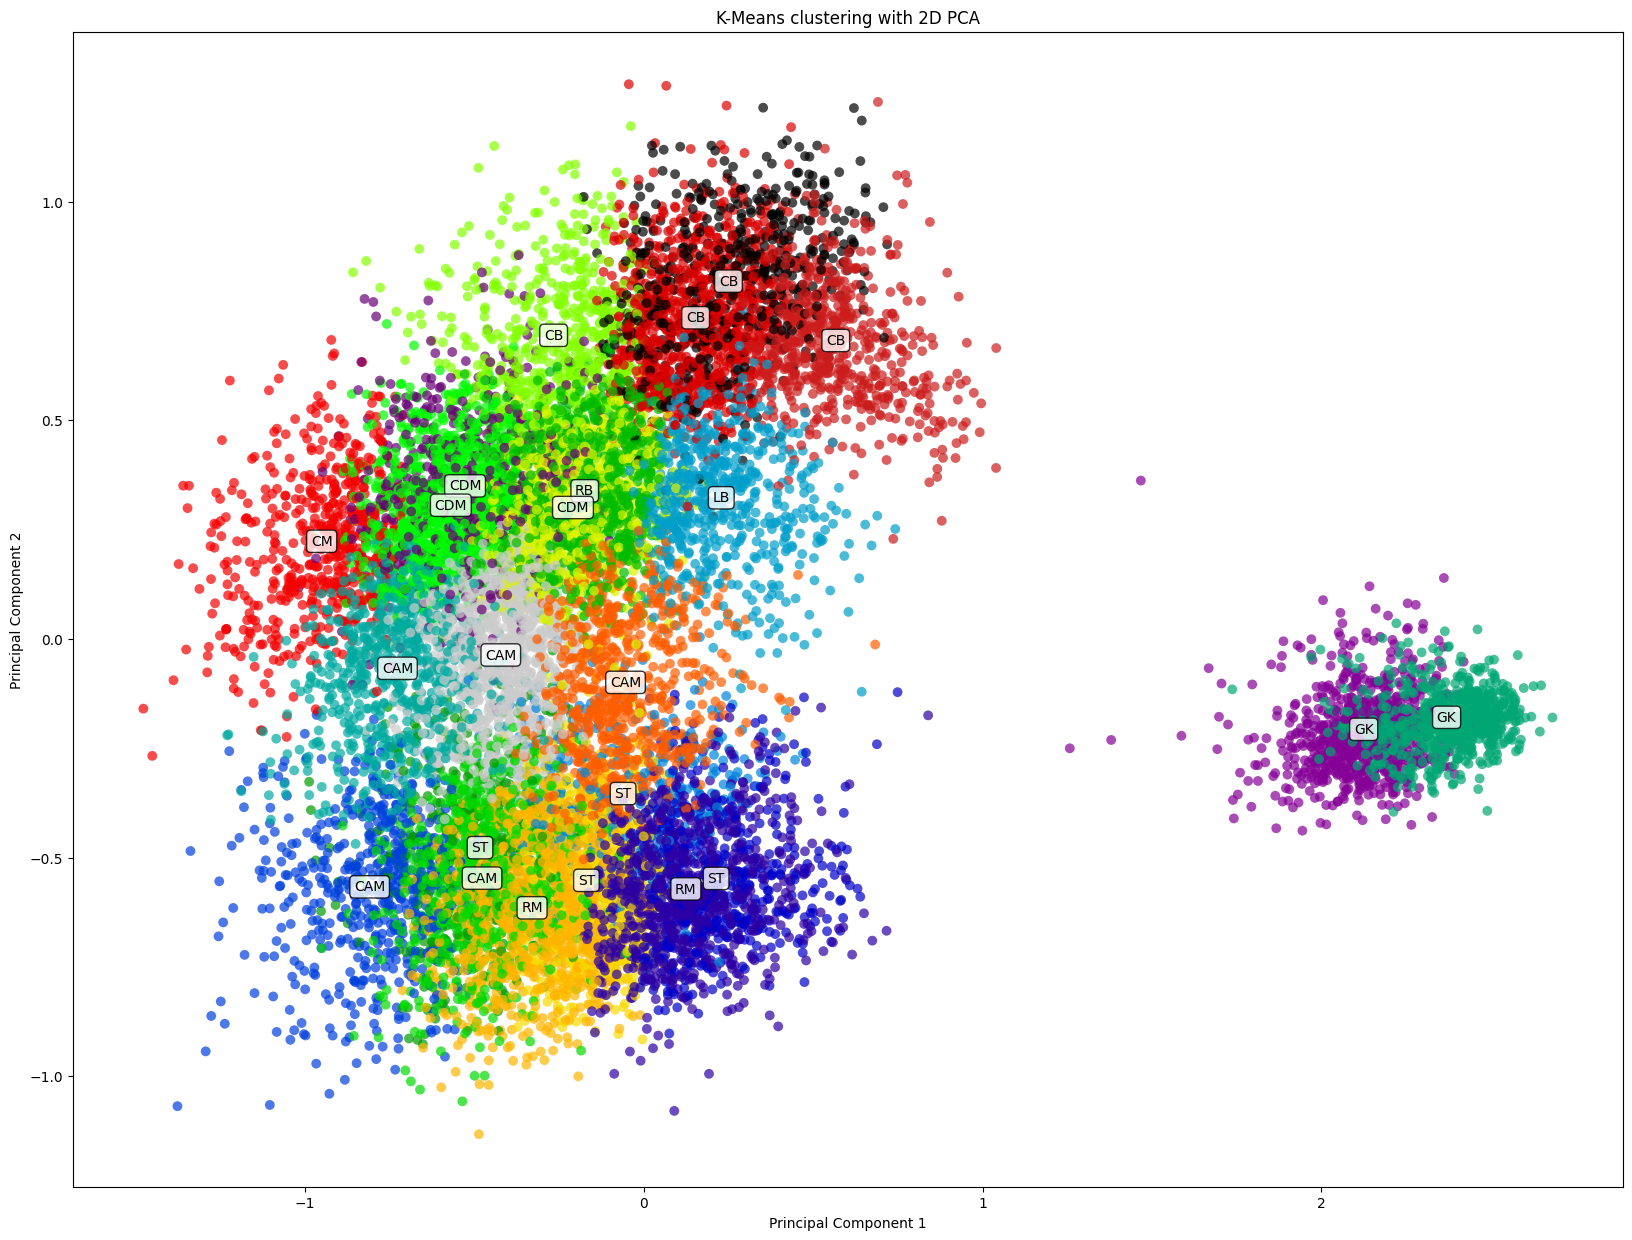

In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  

pca_result = pca.fit_transform(df_kmeans.drop(['Clusters', 'Best Position'], axis=1, errors='ignore'))
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = labels

cluster_modes = df_kmeans.groupby('Clusters')['Best Position'].agg(lambda x: Counter(x).most_common(1)[0][0])

cluster_labels = cluster_modes.to_dict()
df_pca['Cluster_Labels'] = df_pca['Clusters'].apply(lambda x: cluster_labels[x])

colors = plt.cm.nipy_spectral(df_pca['Clusters'].astype(float) / max(df_pca['Clusters']))
plt.figure(figsize=(20, 15))  

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], s=50, lw=0, alpha=0.7, c=colors, edgecolor='k')
plt.title('K-Means clustering with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

centroids = pca.transform(clustering.cluster_centers_)  
for i, centroid in enumerate(centroids):  
    plt.text(centroid[0], centroid[1], cluster_labels[i], ha='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.8))  
  
plt.show()  


### Replace similar positions